In this notebook, we want to fit different models to the cleaned data from the 'data_inspection' notebook. We start with simple models like ARIMA and will work our way to pure deep learning.

In [21]:
# imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [22]:
# load cleaned data

turbine_two = pd.read_csv('../data_cleaned/turbine_2.csv')
# set column Date to datetime format
turbine_two.Date = pd.to_datetime(turbine_two.Date)
# set column Date to index
turbine_two = turbine_two.set_index('Date')

In [23]:
# create hourly and daily aggregates 
turbine_two_hourly = turbine_two.resample('H').mean()
turbine_two_daily = turbine_two.resample('D').mean()

,Wind speed (m/s),"Wind speed, Standard deviation (m/s)","Wind speed, Minimum (m/s)","Wind speed, Maximum (m/s)",Long Term Wind (m/s),Wind speed Sensor 1 (m/s),"Wind speed Sensor 1, Standard deviation (m/s)","Wind speed Sensor 1, Minimum (m/s)","Wind speed Sensor 1, Maximum (m/s)",Wind speed Sensor 2 (m/s),...,"Wind direction, Minimum (°)","Wind direction, Maximum (°)","Nacelle position, Standard deviation (°)","Nacelle position, Minimum (°)","Nacelle position, Maximum (°)",Vane position 1+2 (°),"Vane position 1+2, Max (°)","Vane position 1+2, Min (°)","Vane position 1+2, StdDev (°)",Energy Export (kWh)
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-01 00:00:00,4.483985,0.704814,3.221956,6.197525,7.1,4.627160,0.671500,3.442538,6.200913,4.458145,...,100.060795,138.794342,1.525173e+00,101.216759,104.326504,15.369169,NaN,NaN,NaN,39.000000
2020-01-01 01:00:00,4.060937,0.878377,2.537680,5.817488,7.1,4.276781,0.828949,2.794710,5.894986,4.134482,...,109.352757,165.672613,0.000000e+00,119.875229,119.875229,13.969585,NaN,NaN,NaN,30.833333
2020-01-01 02:00:00,3.372436,0.888851,1.797964,4.953094,7.1,3.540890,0.864161,2.081247,5.421679,3.429838,...,111.341095,168.465609,2.831625e+00,144.753321,150.972844,-4.471144,NaN,NaN,NaN,15.333333
2020-01-01 03:00:00,2.852170,0.718590,1.464334,4.290537,7.1,2.924133,0.636619,1.867776,4.259807,2.852253,...,123.983822,174.599828,5.684342e-14,157.192368,157.192368,-10.799278,NaN,NaN,NaN,7.166667
2020-01-01 04:00:00,3.246256,0.662620,2.042371,4.403459,7.1,3.339867,0.611274,2.218740,4.470807,3.184589,...,136.527654,176.382436,5.684342e-14,157.192368,157.192368,-0.163367,NaN,NaN,NaN,13.333333


## 1. ARIMA

[Medium Blog Entry](https://medium.com/mlearning-ai/multivariate-time-series-using-var-model-efa215371738)


In [24]:
# import
from statsmodels.tools.eval_measures import rmse, meanabs
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# from utils.helpers import check_stationarity

### 1.1. Hourly Forecast

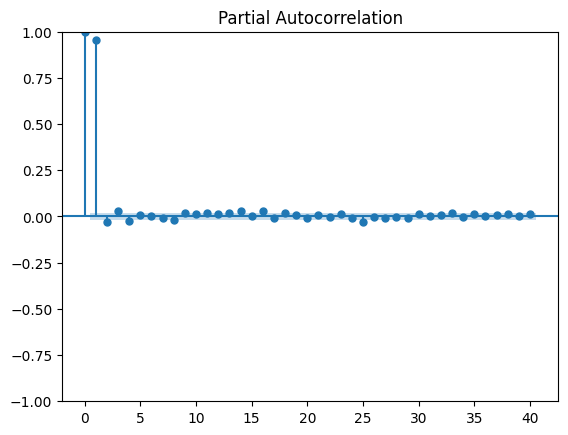

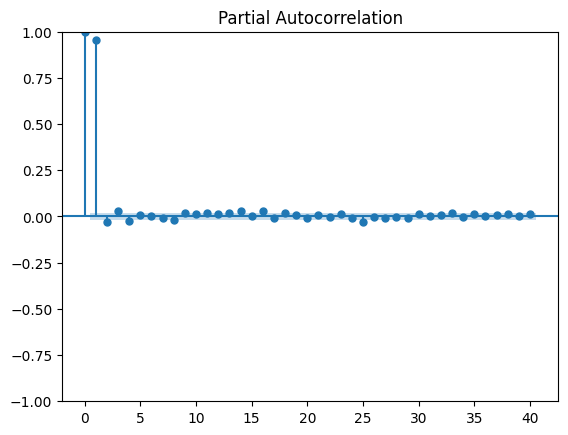

In [25]:
plot_pacf(turbine_two_hourly['Energy Export (kWh)'])

In [26]:
from statsmodels.tsa.stattools import adfuller


# it is necessary to check if the data is stationary. We can do this by using the Augmented Dickey-Fuller test
def check_stationarity(series):
    result = adfuller(series)
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'{key}: {value}')

In [27]:
# if the p-value is smaller than 0.05, the data is stationary
# if the p-value is larger than 0.05, the data is not stationary
check_stationarity(turbine_two_hourly['Energy Export (kWh)'])

ADF Statistic: -10.641190602922945
p-value: 4.925135136673023e-19
Critical Values:
1%: -3.43109620304953
5%: -2.861869772247727
10%: -2.566945532790625


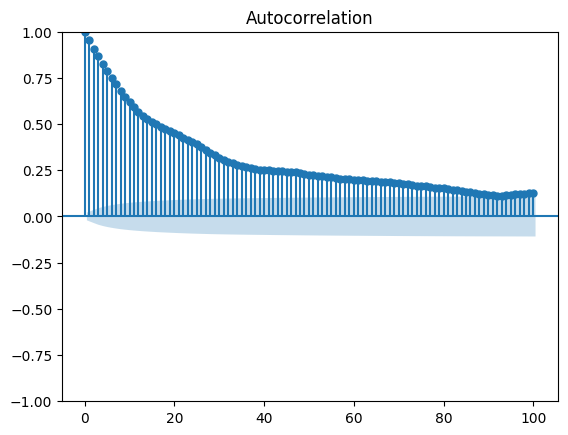

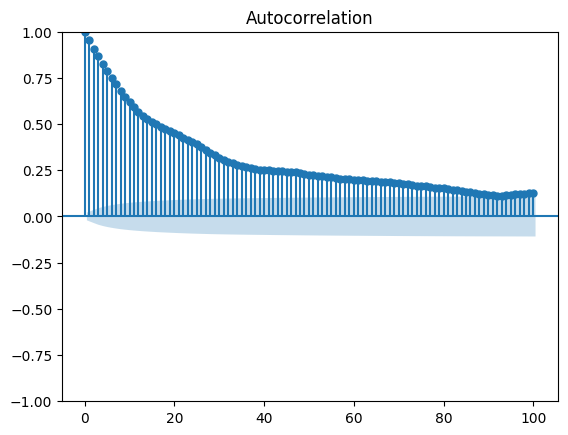

In [28]:
plot_acf(turbine_two_hourly['Energy Export (kWh)'], lags=100)

#### 1.2.2. Fit model

In [29]:
# create training and testing set
train_set = turbine_two_hourly[:'2020-12-30']
test_set = turbine_two_hourly['2020-12-31':]

In [30]:
# # create model
# model = ARIMA(train_set['Energy Export (kWh)'], order=(2, 0, 90))
# # fit model
# model_fit = model.fit()
# # summary of fit model
# print(model_fit.summary())

# did not work for me because of two many parameters


### 1.3. Daily forecast

#### 1.3.1. Find (p, d, q) - Values

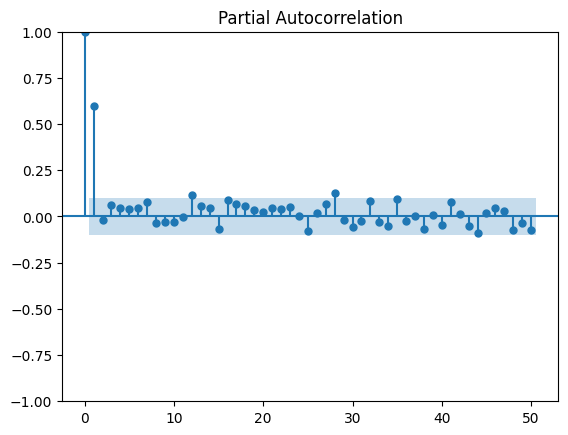

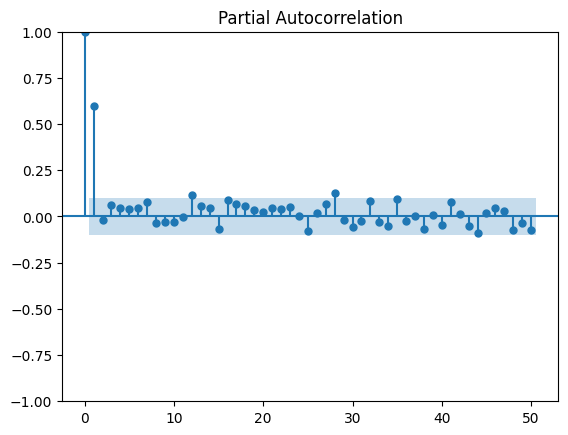

In [31]:
plot_pacf(turbine_two_daily['Energy Export (kWh)'], lags=50)


In [32]:
# Check stationarity of the data
check_stationarity(turbine_two_daily['Energy Export (kWh)'])

ADF Statistic: -9.550175070498884
p-value: 2.5845315671690415e-16
Critical Values:
1%: -3.4483935212959844
5%: -2.8694912343676497
10%: -2.571005879151811


-> Parameter d = 0

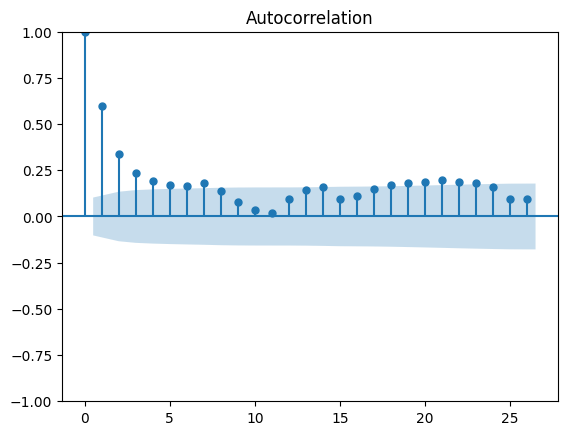

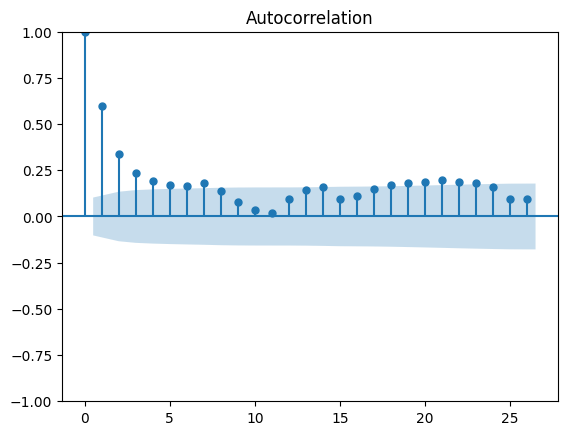

In [33]:
# find q value
plot_acf(turbine_two_daily['Energy Export (kWh)'])

#### 1.3.2. Fit Model

In [34]:
# create train and test sets (ratio 80:20)
train_set = turbine_two_daily[:int(len(turbine_two_daily)*0.8)]
test_set = turbine_two_daily[int(len(turbine_two_daily)*0.8):]

In [35]:
# create model
model = ARIMA(train_set['Energy Export (kWh)'], order=(2, 0, 4))
# fit model
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())


                                SARIMAX Results                                
Dep. Variable:     Energy Export (kWh)   No. Observations:                  292
Model:                  ARIMA(2, 0, 4)   Log Likelihood               -1673.843
Date:                 Mon, 26 Jun 2023   AIC                           3363.687
Time:                         13:30:58   BIC                           3393.101
Sample:                     01-01-2020   HQIC                          3375.469
                          - 10-18-2020                                         
Covariance Type:                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        126.7357     26.826      4.724      0.000      74.157     179.314
ar.L1          0.2288      0.576      0.397      0.691      -0.901       1.358
ar.L2          0.7385      0.561      1.317 

In [36]:
# create forecast
forecast = model_fit.forecast(steps=len(test_set))

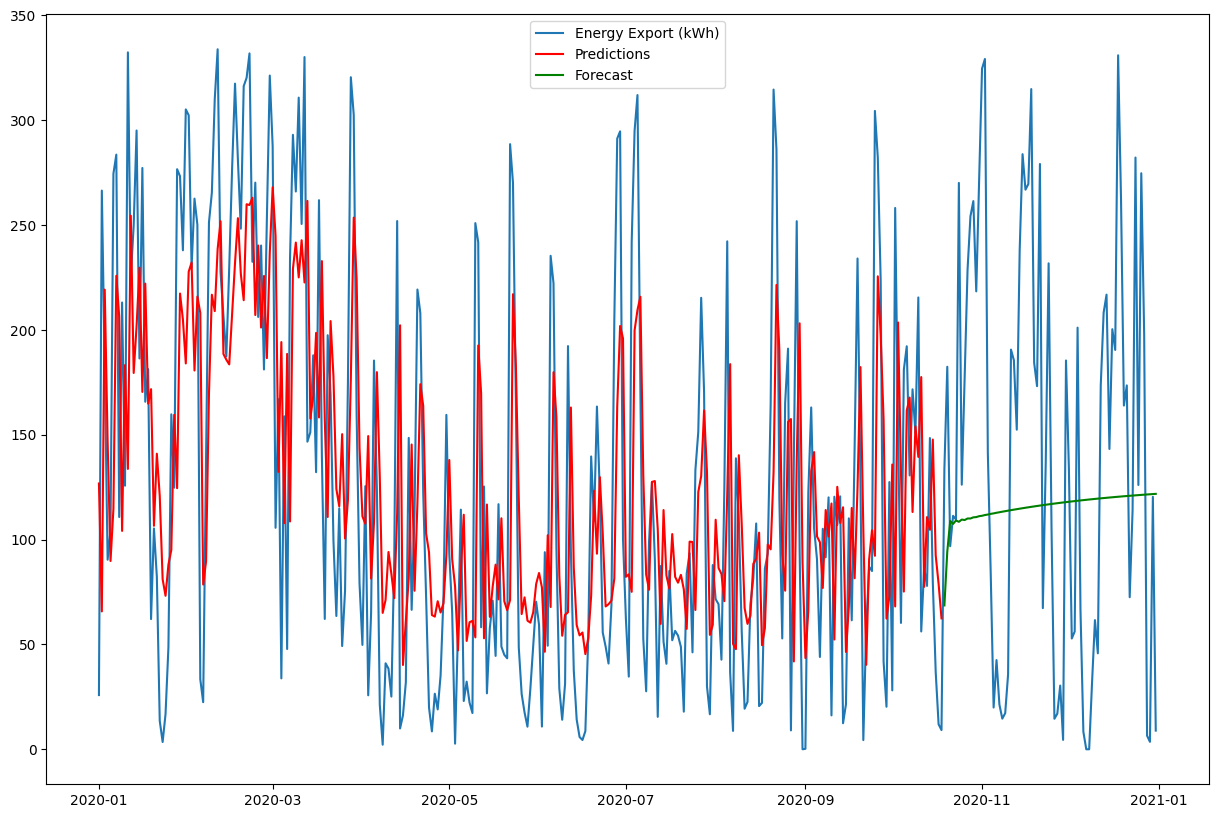

In [37]:
# plot results
plt.figure(figsize=(15, 10))
plt.plot(turbine_two_daily['Energy Export (kWh)'], label='Energy Export (kWh)')
plt.plot(model_fit.predict(), color='red', label='Predictions')
plt.plot(forecast, color='green', label='Forecast')
plt.legend()
plt.show()

In [39]:
# rmse on training set
print(f"RMSE: {rmse(train_set['Energy Export (kWh)'], model_fit.predict())}")

# MAE on training set
print(f"MAE: {meanabs(train_set['Energy Export (kWh)'], model_fit.predict())}")

RMSE: 74.76139346522136
MAE: 60.973675282941755


## 2. Random Forests

[Blog Entry](https://machinelearningmastery.com/random-forest-for-time-series-forecasting/)

## 3. Gradient Boosting Machines

## 4. Gaussian Processes

## 5. ODEs / PDEs

## 6. Prophet

[Medium Blog Entry](https://medium.com/@bobrupakroy/yes-our-favorite-fbprophet-is-back-with-multivariate-forecasting-785fbe412731)

## 6. LSTMs

[Medium Blog Entry](https://medium.com/@bobrupakroy/multi-variate-lstm-time-series-forecasting-1a736009f6d)

## 7. Exponential Smoothing

## 7. Analysis